In [117]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
import scipy.stats as sp
from typing import *

# Simulation of a market with a Black Scholes model

we use the following formula:
$$S_t = S_0 e^{(r - \frac{\sigma^2}{2})t + \sigma B_t}$$
with $B_t$ a standard Brownian movement, $r>0$ the rate supposed to be constant and the volatility $\sigma > 0$ 

We can then write:
$$S_{t+u} = S_t e^{(r - \frac{\sigma^2}{2})t + \sigma(B_{t+u} - B_t)}$$
Here we chose $u = 1$

## Initialisation of the object

In [118]:
class Black_scholes_model:
    def __init__(self, r: List[float], sigma: List[float], 
                 nb_asset: int, nb_point: int, S0: List[float]):
        self.__rate = r
        self.__sigma = sigma
        self.__nb_asset = nb_asset
        self.__nb_point = nb_point
        self.__price_init = S0
        
    def asset(self) -> np.array:
        X = random.normal(size=(self.__nb_point, self.__nb_asset,))
        S = np.zeros_like(X)
        S[0] = self.__price_init
        for i in range(1, self.__nb_point):
            S[i] = S[i-1]*np.exp((self.__rate - (np.array(self.__sigma)**2)/2) + self.__sigma*X[i])
        return S
            

## Test and plot

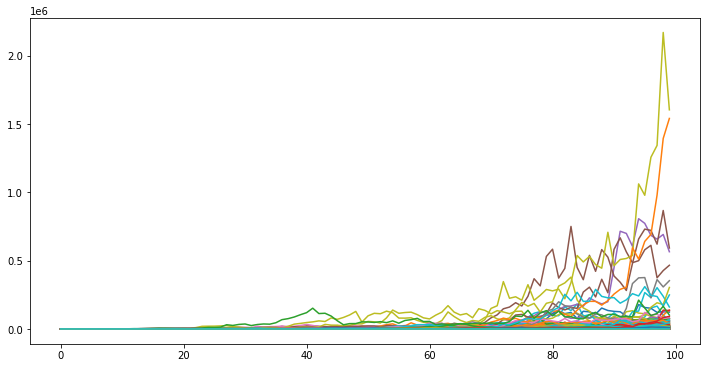

In [122]:
n = 600
a = Black_scholes_model([0.05]*n,[0.3]*n,n,100, [100]*n)
B = a.asset()
plt.figure(figsize=(12,6))
plt.plot(B)
plt.show()